In [317]:
import numpy as np
import skfuzzy as fuzz
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [318]:
exercicio = 2
taxa_morte_municipio = 128
cancer_historico = 1
exercicio = int((exercicio*300)/7)

In [319]:
print(exercicio)

85


In [320]:
x_exercicios = np.arange(0, 301, 1) # Dias de exercicio por semana [0,7]
x_taxa_morte_municipio = np.arange(0, 301, 1) # Glicemia em jejum [0,300]
x_cancer_historico  = np.arange(0, 2, 1) # Glicemia pos refeicao [0,300]
x_saida = np.arange(0,101,1) # saida em porcento 

In [321]:
x_cancer_historico

array([0, 1])

In [322]:
exercicio_baixo = fuzz.trimf(x_exercicios, [0, 64, 128])
exercicio_normal = fuzz.trimf(x_exercicios, [85, 150, 214])
exercicio_alto = fuzz.trimf(x_exercicios, [171, 235, 300])

# municipio risco

taxa_morte_municipio_baixissimo = fuzz.trimf(x_taxa_morte_municipio, [0, 10, 20])
taxa_morte_municipio_baixo = fuzz.trimf(x_taxa_morte_municipio, [20, 30, 40])
taxa_morte_municipio_normal = fuzz.trimf(x_taxa_morte_municipio, [40, 50, 60])
taxa_morte_municipio_alto = fuzz.trimf(x_taxa_morte_municipio, [60, 70, 80])
taxa_morte_municipio_altissimo = fuzz.trimf(x_taxa_morte_municipio, [80, 100, 200])

# cancer risco

cancer_baixo = fuzz.trimf(x_cancer_historico, [0, 0, 1])
cancer_alto = fuzz.trimf(x_cancer_historico, [1, 1, 1])

#saida

perigo_baixo_x = fuzz.trimf(x_saida, [0, 10, 20])
perigo_alto_x = fuzz.trimf(x_saida, [15, 30, 40])
perigo_muito_alto = fuzz.trimf(x_saida, [40, 50, 60])
perigo_muito_alto = fuzz.trimf(x_saida, [60, 70, 80])
perigo_muito_alto = fuzz.trimf(x_saida, [80, 90, 100])

In [323]:
exercicio_level_baixo = fuzz.interp_membership(x_exercicios, exercicio_baixo, exercicio)
exercicio_level_normal = fuzz.interp_membership(x_exercicios, exercicio_normal, exercicio)
exercicio_level_alto = fuzz.interp_membership(x_exercicios, exercicio_alto, exercicio)


# fazendo a vendo qual a relação dos municipios e classificando 
taxa_morte_municipio_level_baixissimo = fuzz.interp_membership(x_taxa_morte_municipio, taxa_morte_municipio_baixissimo, taxa_morte_municipio)
taxa_morte_municipio_level_baixo = fuzz.interp_membership(x_taxa_morte_municipio, taxa_morte_municipio_baixo, taxa_morte_municipio)
taxa_morte_municipio_level_normal = fuzz.interp_membership(x_taxa_morte_municipio, taxa_morte_municipio_normal, taxa_morte_municipio)
taxa_morte_municipio_level_alto = fuzz.interp_membership(x_taxa_morte_municipio, taxa_morte_municipio_alto, taxa_morte_municipio)
taxa_morte_municipio_level_altissimo = fuzz.interp_membership(x_taxa_morte_municipio, taxa_morte_municipio_altissimo, taxa_morte_municipio)

# vendo a realação do cancer
cancer_historico_level_baixo = fuzz.interp_membership(x_cancer_historico, cancer_baixo, cancer_historico)
cancer_historico_level_medio = fuzz.interp_membership(x_cancer_historico, cancer_alto, cancer_historico)

In [324]:
# perigo altissimo
perigo_altissimo = np.fmin(np.fmax(taxa_morte_municipio_level_altissimo,np.fmin(cancer_historico_level_medio,exercicio_level_baixo)),perigo_muito_alto)
perigo_altissimo = np.fmin(np.fmax(taxa_morte_municipio_level_altissimo,np.fmin(cancer_historico_level_medio,exercicio_level_normal)),perigo_muito_alto)

#perigo alto

perigo_alto = np.fmin(np.fmax(taxa_morte_municipio_level_alto,np.fmin(cancer_historico_level_medio,exercicio_level_normal)),perigo_alto_x)
perigo_alto = np.fmin(np.fmax(taxa_morte_municipio_level_alto,np.fmin(cancer_historico_level_baixo,exercicio_level_baixo)),perigo_alto_x)

#perigo medio
perigo_medio = np.fmin(np.fmax(taxa_morte_municipio_level_baixo,np.fmin(cancer_historico_level_medio,exercicio_level_normal)),perigo_baixo_x)
perigo_medio = np.fmin(np.fmax(taxa_morte_municipio_level_baixo,np.fmin(cancer_historico_level_baixo,exercicio_level_alto)),perigo_baixo_x)



In [197]:
perigo_altissimo

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
       0.2       , 0.24      , 0.28      , 0.32      , 0.36      ,
       0.4       , 0.44      , 0.48      , 0.52      , 0.56   

In [189]:
taxa_morte_municipio_level_alto

0.0

In [178]:
perigo_alto

0.72

In [118]:
saida_p = np.fmin(
    np.fmin(np.fmax(taxa_morte_municipio_level_altissimo, cancer_historico_level_medio),
        exercicio_level_baixo), saida_provavel)


In [121]:
saida_p = np.fmin(
		np.fmin(np.fmax(taxa_morte_municipio_level_alto, cancer_historico_level_baixo),
			exercicio_level_normal), saida_provavel)

In [125]:
saida_muito_provavel = np.fmin(
		np.fmin(np.fmax(taxa_morte_municipio_level_alto, cancer_historico_level_medio),
			exercicio_level_baixo), saida_muito_provavel)

In [ ]:
saida_muito_provavel = np.fmin(
		np.fmin(np.fmax(taxa_morte_municipio_level_normal, cancer_historico_level_medio),
			exercicio_level_normal), saida_muito_provavel)

In [32]:
saida_pp = np.fmin(
		np.fmin(np.fmax(glicemia_jejum_level_medio,glicemia_jejum_level_baixo), 
			glicemia_pos_level_medio), saida_pouco_provavel)

In [34]:
saida_p

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.1 ,
       0.15, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.15, 0.1 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [36]:
saida_p

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.1 ,
       0.15, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.15, 0.1 , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [38]:
saida_pp

array([0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
       0.2       , 0.24      , 0.28      , 0.32      , 0.36      ,
       0.4       , 0.44      , 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.44444444, 0.44      ,
       0.4       , 0.36      , 0.32      , 0.28      , 0.24      ,
       0.2       , 0.16      , 0.12      , 0.08      , 0.04      ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [199]:
aggregated = np.fmax(perigo_baixo, np.fmax(perigo_alto, perigo_altissimo))

In [200]:
aggregated

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
       0.2       , 0.24      , 0.28      , 0.32      , 0.36      ,
       0.4       , 0.44      , 0.48      , 0.52      , 0.56   

90.0

In [329]:
result = fuzz.defuzzify.dcentroid(x_saida, aggregated, 61.4)
result

81.4602026049204

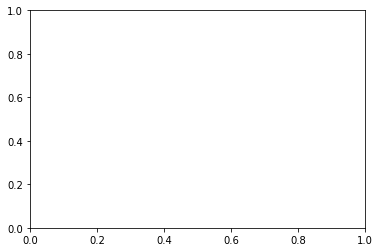

In [327]:
fig, ax = plt.subplots()

In [315]:
perigo_exemplo_1 = fuzz.gaussmf(x_saida,10,5)
perigo_exemplo_2 = fuzz.gaussmf(x_saida, 30, 5)
perigo_exemplo_3 = fuzz.gaussmf(x_saida, 40, 5)


In [303]:
x_saida

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

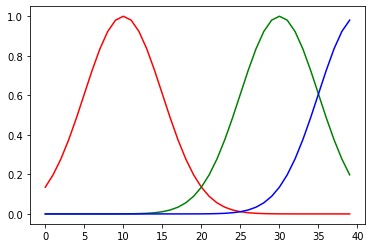

In [316]:
plt.plot(x_saida,perigo_exemplo_1,'r',x_saida,perigo_exemplo_2,'g',perigo_exemplo_3,'b')

In [308]:
x_saida = np.arange(0,40,1)